In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./data/Alpha_bank.csv')

In [3]:
#show the data
data.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,housemaid,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin.,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin.,married,Professional_Education,no,no,no,no


In [4]:
#check if we need to impute values
data.describe()

,Age
count,30477.000000
mean,39.028120
std,10.333885
min,17.000000
25%,31.000000
50%,37.000000
75%,45.000000
max,95.000000


In [5]:
#create dummy columns for categorical data - use pandas - get dummies
dataEncoded = pd.get_dummies(data,columns = ['Job'], drop_first=True)
#drop_first will put columns in alphabetical order and drop first one - e.g. admin in this case





In [6]:
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Marital_Status'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Education'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Default_Credit'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Housing_Loan'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Personal_Loan'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Subscribed'], drop_first=True)


In [7]:
dataEncoded

,Age,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Marital_Status_married,Marital_Status_single,Education_Professional_Education,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_yes,Housing_Loan_yes,Personal_Loan_yes,Subscribed_yes
0,56,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,37,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,56,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,59,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30472,73,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1
30473,46,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
30474,56,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
30475,44,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1


In [8]:
dataEncoded.columns #get column names to make it easy to split

Index(['Age', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_Status_married', 'Marital_Status_single',
       'Education_Professional_Education', 'Education_Secondary_Education',
       'Education_Tertiary_Education', 'Default_Credit_yes',
       'Housing_Loan_yes', 'Personal_Loan_yes', 'Subscribed_yes'],
      dtype='object')

In [9]:
#split data into training and test set
x=dataEncoded[['Age', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_Status_married', 'Marital_Status_single',
       'Education_Professional_Education', 'Education_Secondary_Education',
       'Education_Tertiary_Education', 'Default_Credit_yes',
       'Housing_Loan_yes', 'Personal_Loan_yes']]
y=dataEncoded['Subscribed_yes']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25 ,random_state = 20 )

In [30]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

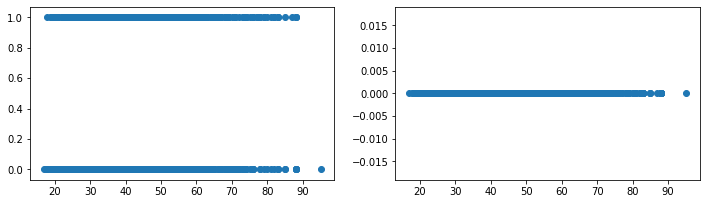

In [52]:
y_test_predicted = lr.predict(x_test)

plt.figure(figsize=(12, 7))
plt.subplot(2,2,1)
plt.scatter(x_test['Age'], y_test)
plt.subplot(2,2,2)
plt.scatter(x_test['Age'], y_test_predicted)

In [38]:
#x_train.size

print(x_train.shape)
print(y_train.shape)

(22857, 19)
(22857,)


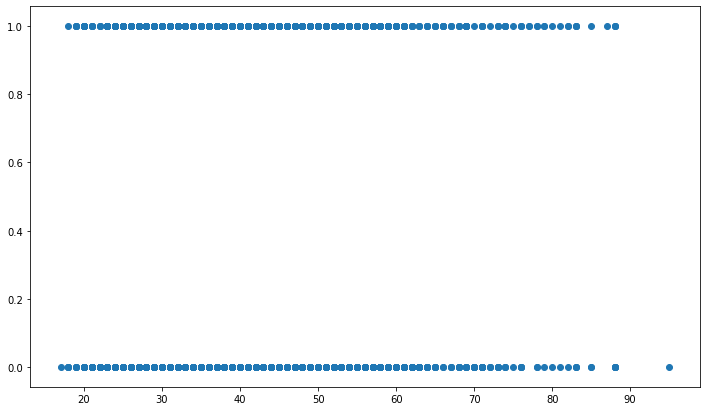

In [47]:
#prob = lr.predict_proba(x_test)[:, 1]

# changing threshold will change which samples are classified 1 (Purchased) and which are classified 0 (Not Purchased)
#th = 0.5
#plt.figure(figsize=(12, 7))
#plt.scatter(x_test[prob < th], y_test[prob < th], c='red', )
#plt.scatter(x[prob >= th], y[prob >= th], c='green')
#plt.scatter(y_test, lr.predict_proba(x_test)[:, 1])
#plt.scatter(x_test['Age'], y_test)
#plt.hlines(th, min(x), max(x), linestyles='dashed')

In [53]:
import sklearn.metrics as skmetrics

y_test.value_counts()



0    6687
1     933
Name: Subscribed_yes, dtype: int64

In [55]:
skmetrics.confusion_matrix(y_test, y_test_predicted)

array([[6687,    0],
       [ 933,    0]], dtype=int64)

In [57]:
print('Our model has correctly classified {0}% of all observations in the test data' \
      .format(skmetrics.accuracy_score(y_test, y_test_predicted) * 100))

#but out model doesn't recognise anyone who  has subscribed



Our model has correctly classified 87.75590551181102% of all observations in the test data


In [59]:
prec = skmetrics.precision_score(y_test, y_test_predicted, average=None)
prec = (prec * 100).round(1)
print('Out of all predicted positives (1), the model was correct about {0}% of them.\n' \
      'The remaining {1}% of predicted positives should have been classified as negatives (0). (Type I error)\n' \
      .format(prec[1], round(100 - prec[1], 1)))
print('Out of all predicted negatives (0), the model was correct about {0}% of them.\n' \
      'The remaining {1}% of predicted negatives should have been classified as positives (1). (Type II error)' \
      .format(prec[0], round(100 - prec[0], 1)))

Out of all predicted positives (1), the model was correct about 0.0% of them.
The remaining 100.0% of predicted positives should have been classified as negatives (0). (Type I error)

Out of all predicted negatives (0), the model was correct about 87.8% of them.
The remaining 12.2% of predicted negatives should have been classified as positives (1). (Type II error)


c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
recall = skmetrics.recall_score(y_test, y_test_predicted, average=None)
recall = (recall * 100).round(1)
#recall

print('Our model correctly classified (recalled) {0}% positives (1) and {1}% negatives (0).\n' \
     .format(recall[1], recall[0]))

Our model correctly classified (recalled) 0.0% positives (1) and 100.0% negatives (0).



In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [66]:
predicted_prob = lr.predict_proba(x_test)[:, 1]

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_prob)

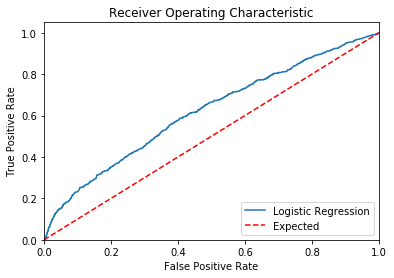

In [73]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'r--', label='Expected')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
roc_table = pd.DataFrame(data={'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
#to view
#roc_table

In [70]:
from sklearn.preprocessing import binarize
y_new_predicted = binarize(predicted_prob.reshape(1, -1), 0.39)[0]
skmetrics.confusion_matrix(y_test, y_new_predicted.astype(int))


array([[6675,   12],
       [ 931,    2]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_new_predicted))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93      6687
           1       0.14      0.00      0.00       933

    accuracy                           0.88      7620
   macro avg       0.51      0.50      0.47      7620
weighted avg       0.79      0.88      0.82      7620



In [90]:
subscribedByJob = (data.groupby('Job')['Subscribed'].sum()/
                   data.groupby('Job')['Subscribed'].count())

print(subscribedByJob)

TypeError: unsupported operand type(s) for /: 'str' and 'int'